In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML_project

We import ibtracs.csv, but we need to delete the row with id = 1, which contains the units of measurement.

In [2]:
csv_link = r"C:\Users\arnau\Documents\DSTI\ML_project\data\ibtracs.csv"

In [3]:
df_ibtracs = pd.read_csv(
    csv_link,
    skiprows=[1],
    header=0     
)

C:\Users\arnau\AppData\Local\Temp\ipykernel_20936\1240344203.py:1: DtypeWarning: Columns (19,20,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ibtracs = pd.read_csv(


## Data Cleaning

In [4]:
df_ibtracs.shape

(297098, 174)

We retrieve the ID of all the metrics we want to remove from "IBTRACS_variable_documentation" into a list. Then we subtract 1 from the list to respect Python's index.

In [5]:
IdToRemove = [1,2,3,4,5,6,13,14,17,18,19,20,21,22,23,26,43,44,55,56,57,60,61,62,65,66,67,76,77,78,84,85,86,104,105,106,127,128,129,130,131,134,135,138,139,140,143,144,148,149,153,154,155,158,159]
IdToRemove = [i - 1 for i in IdToRemove]

In [6]:
df_transforme = df_ibtracs.drop(df_ibtracs.columns[IdToRemove],axis = 1)

In [7]:
df_transforme.shape

(297098, 119)

We delete all the rows from our DataFrame where the metric TD9636_STAGE has no value.

In [8]:
df_transforme["TD9636_STAGE"] = pd.to_numeric(df_transforme["TD9636_STAGE"].replace(" ", np.nan))

In [9]:
df_cleaned = df_transforme.dropna(subset=["TD9636_STAGE"], axis=0, how='any', inplace=False)

In [10]:
df_cleaned.shape

(48343, 119)

We replace the cells with (" ") by np.nan, which allows us to change the type to float.
We set aside the columns of type str : ['NATURE', 'MLC_CLASS',"ISO_TIME"].

In [11]:
metrics = df_cleaned.columns.tolist()

In [12]:
metrics.remove("NATURE")
metrics.remove("MLC_CLASS")
metrics.remove("ISO_TIME")

In [13]:
for metric in metrics:
    df_cleaned.loc[:, metric] = pd.to_numeric(df_cleaned[metric].replace(" ", np.nan))

C:\Users\arnau\AppData\Local\Temp\ipykernel_20936\116189238.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.loc[:, metric] = pd.to_numeric(df_cleaned[metric].replace(" ", np.nan))


Creation of a column MONTH, Deletion of the ISO_TIME column.

In [14]:
df_cleaned["MONTH"] = pd.to_numeric(pd.to_datetime(df_cleaned.ISO_TIME).dt.month)

C:\Users\arnau\AppData\Local\Temp\ipykernel_20936\2446028580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["MONTH"] = pd.to_numeric(pd.to_datetime(df_cleaned.ISO_TIME).dt.month)


In [15]:
df_cleaned = df_cleaned.drop("ISO_TIME",axis = 1)

The following part processes through all our columns to check the number of null values, allowing us to create a list of metrics to drop: metrics_todrop.

In [16]:
metrics_wind = [metric for metric in df_cleaned.columns if 'WIND' in metric]
nb_nulls_wind = df_cleaned[metrics_wind].isnull().sum()
nb_nulls_wind

WMO_WIND           31086
USA_WIND            7876
TOKYO_WIND         37501
CMA_WIND           33190
HKO_WIND           35341
KMA_WIND           48343
NEWDELHI_WIND      47777
REUNION_WIND       44463
BOM_WIND           42057
NADI_WIND          48343
WELLINGTON_WIND    43960
DS824_WIND         44691
TD9636_WIND         8647
TD9635_WIND        48343
NEUMANN_WIND       33666
MLC_WIND           48343
dtype: int64

In [17]:
metrics_tokeep = ["USA_WIND", "TD9636_WIND"]
metrics_todrop = list(filter(lambda x: x not in metrics_tokeep, metrics_wind)) 

In [18]:
metrics_pres = [metric for metric in df_cleaned.columns if 'PRES' in metric]

In [19]:
nb_nulls_pres = df_cleaned[metrics_pres].isnull().sum()
nb_nulls_pres

WMO_PRES           33584
USA_PRES           46775
TOKYO_PRES         32937
CMA_PRES           33176
HKO_PRES           35341
KMA_PRES           48343
NEWDELHI_PRES      48118
REUNION_PRES       45186
BOM_PRES           42193
NADI_PRES          48343
WELLINGTON_PRES    43960
DS824_PRES         47998
TD9636_PRES        48343
TD9635_PRES        48343
NEUMANN_PRES       45442
MLC_PRES           48343
dtype: int64

In [20]:
metrics_todrop = metrics_pres + metrics_todrop

In [21]:
df_cleaned.DIST2LAND.isnull().sum()

np.int64(0)

In [22]:
df_cleaned.LANDFALL.isnull().sum()

np.int64(450)

In [23]:
metrics_usa = [metric for metric in df_cleaned.columns if 'USA' in metric]
nb_nulls_usa = df_cleaned[metrics_usa].isnull().sum()
nb_nulls_usa

USA_WIND          7876
USA_PRES         46775
USA_R34_NE       48343
USA_R34_SE       48343
USA_R34_SW       48343
USA_R34_NW       48343
USA_R50_NE       48343
USA_R50_SE       48343
USA_R50_SW       48343
USA_R50_NW       48343
USA_R64_NE       48343
USA_R64_SE       48343
USA_R64_SW       48343
USA_R64_NW       48343
USA_POCI         48343
USA_ROCI         48343
USA_RMW          48343
USA_EYE          48343
USA_GUST         48343
USA_SEAHGT       48343
USA_SEARAD_NE    48343
USA_SEARAD_SE    48343
USA_SEARAD_SW    48343
USA_SEARAD_NW    48343
dtype: int64

In [24]:
metrics_tokeep = ["USA_WIND"]
metrics_todrop = metrics_todrop + list(filter(lambda x: x not in metrics_tokeep, metrics_usa))

In [25]:
metrics_tokyo = [metric for metric in df_cleaned.columns if 'TOKYO' in metric]
nb_nulls_tokyo = df_cleaned[metrics_tokyo].isnull().sum()
nb_nulls_tokyo

TOKYO_GRADE        32904
TOKYO_WIND         37501
TOKYO_PRES         32937
TOKYO_R50_DIR      32904
TOKYO_R50_LONG     42337
TOKYO_R50_SHORT    42337
TOKYO_R30_DIR      32904
TOKYO_R30_LONG     37501
TOKYO_R30_SHORT    37503
TOKYO_LAND         40599
dtype: int64

In [26]:
metrics_todrop = metrics_todrop + metrics_tokyo

In [27]:
metrics_kma= [metric for metric in df_cleaned.columns if 'KMA' in metric]
nb_nulls_kma = df_cleaned[metrics_kma].isnull().sum()
nb_nulls_kma

KMA_WIND         48343
KMA_PRES         48343
KMA_R50_DIR      48343
KMA_R50_LONG     48343
KMA_R50_SHORT    48343
KMA_R30_DIR      48343
KMA_R30_LONG     48343
KMA_R30_SHORT    48343
dtype: int64

In [28]:
metrics_todrop = metrics_todrop + metrics_kma

In [29]:
metrics_newdelhi = [metric for metric in df_cleaned if 'NEWDELHI' in metric]
nb_null_newdelhi = df_cleaned[metrics_newdelhi].isnull().sum()
nb_null_newdelhi

NEWDELHI_WIND    47777
NEWDELHI_PRES    48118
NEWDELHI_CI      48052
NEWDELHI_DP      47804
NEWDELHI_POCI    48343
dtype: int64

In [30]:
metrics_todrop = metrics_todrop + metrics_newdelhi

In [31]:
metrics_reunion = [metric for metric in df_cleaned if 'REUNION' in metric]
nb_null_reunion = df_cleaned[metrics_reunion].isnull().sum()
nb_null_reunion

REUNION_WIND        44463
REUNION_PRES        45186
REUNION_TNUM        45691
REUNION_CI          46693
REUNION_RMW         48343
REUNION_R34_NE      48343
REUNION_R34_SE      48343
REUNION_R34_SW      48343
REUNION_R34_NW      48343
REUNION_R50_NE      48343
REUNION_R50_SE      48343
REUNION_R50_SW      48343
REUNION_R50_NW      48343
REUNION_R64_NE      48343
REUNION_R64_SE      48343
REUNION_R64_SW      48343
REUNION_R64_NW      48343
REUNION_GUST        48343
REUNION_GUST_PER    48343
dtype: int64

In [32]:
metrics_todrop = metrics_todrop + metrics_reunion

In [33]:
metrics_bom = [metric for metric in df_cleaned if 'BOM' in metric]
nb_null_bom = df_cleaned[metrics_bom].isnull().sum()
nb_null_bom

BOM_WIND        42057
BOM_PRES        42193
BOM_TNUM        48274
BOM_CI          45269
BOM_RMW         48341
BOM_R34_NE      48343
BOM_R34_SE      48336
BOM_R34_SW      48336
BOM_R34_NW      48343
BOM_R50_NE      48343
BOM_R50_SE      48343
BOM_R50_SW      48343
BOM_R50_NW      48343
BOM_R64_NE      48343
BOM_R64_SE      48343
BOM_R64_SW      48343
BOM_R64_NW      48343
BOM_ROCI        46670
BOM_POCI        48257
BOM_EYE         48225
BOM_GUST        46920
BOM_GUST_PER    46920
dtype: int64

In [34]:
metrics_todrop = metrics_todrop + metrics_bom

In [35]:
metrics_td9635 = [metric for metric in df_cleaned if 'TD9635' in metric]
nb_null_td9635 = df_cleaned[metrics_td9635].isnull().sum()
nb_null_td9635

TD9635_WIND    48343
TD9635_PRES    48343
TD9635_ROCI    48343
dtype: int64

In [36]:
metrics_todrop = metrics_todrop + metrics_td9635

In [37]:
metrics_mlc = [metric for metric in df_cleaned if 'MLC' in metric]
nb_null_mlc = df_cleaned[metrics_mlc].isnull().sum()
nb_null_mlc

MLC_CLASS        0
MLC_WIND     48343
MLC_PRES     48343
dtype: int64

In [38]:
metrics_tokeep = ["MLC_CLASS"]
metrics_todrop = metrics_todrop + list(filter(lambda x: x not in metrics_tokeep, metrics_mlc))

In [39]:
metrics_storm = [metric for metric in df_cleaned if 'STORM' in metric]
nb_null_storm = df_cleaned[metrics_storm].isnull().sum()
nb_null_storm

STORM_SPEED    1
STORM_DIR      1
dtype: int64

In [40]:
metrics_todrop = list(set(metrics_todrop ))

In [41]:
len(metrics_todrop)

107

In [42]:
df_analys = df_cleaned.drop(columns=metrics_todrop)

In [43]:
df_analys.isnull().sum()

NATURE             0
LAT                0
LON                0
DIST2LAND          0
LANDFALL         450
USA_WIND        7876
TD9636_STAGE       0
TD9636_WIND     8647
MLC_CLASS          0
STORM_SPEED        1
STORM_DIR          1
MONTH              0
dtype: int64

## Data analysis

In [44]:
df_analys

,NATURE,LAT,LON,DIST2LAND,LANDFALL,USA_WIND,TD9636_STAGE,TD9636_WIND,MLC_CLASS,STORM_SPEED,STORM_DIR,MONTH
0,TS,-12.5,172.5,647,647.0,25.0,1.0,25.0,,6.0,350.0,1
1,TS,-12.2,172.4,653,653.0,25.0,1.0,NaN,,6.0,350.0,1
2,TS,-11.9,172.4,670,670.0,25.0,1.0,NaN,,5.0,360.0,1
3,TS,-11.7,172.4,682,682.0,25.0,1.0,NaN,,4.0,10.0,1
4,TS,-11.5,172.5,703,703.0,25.0,1.0,NaN,,4.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
67405,TS,14.6,141.6,1760,1716.0,25.0,1.0,25.0,,9.0,250.0,12
67406,TS,14.4,141.2,1713,1669.0,25.0,1.0,24.0,,9.0,250.0,12
67407,TS,14.3,140.8,1669,1622.0,25.0,1.0,23.0,,8.0,250.0,12
67408,TS,14.1,140.4,1622,1578.0,23.0,1.0,21.0,,8.0,250.0,12


In [45]:
df_analys.TD9636_STAGE.value_counts()

TD9636_STAGE
2.0    17204
1.0    16028
4.0    10623
0.0     3156
3.0      742
5.0      331
6.0      259
Name: count, dtype: int64

<Axes: xlabel='LON', ylabel='LAT'>

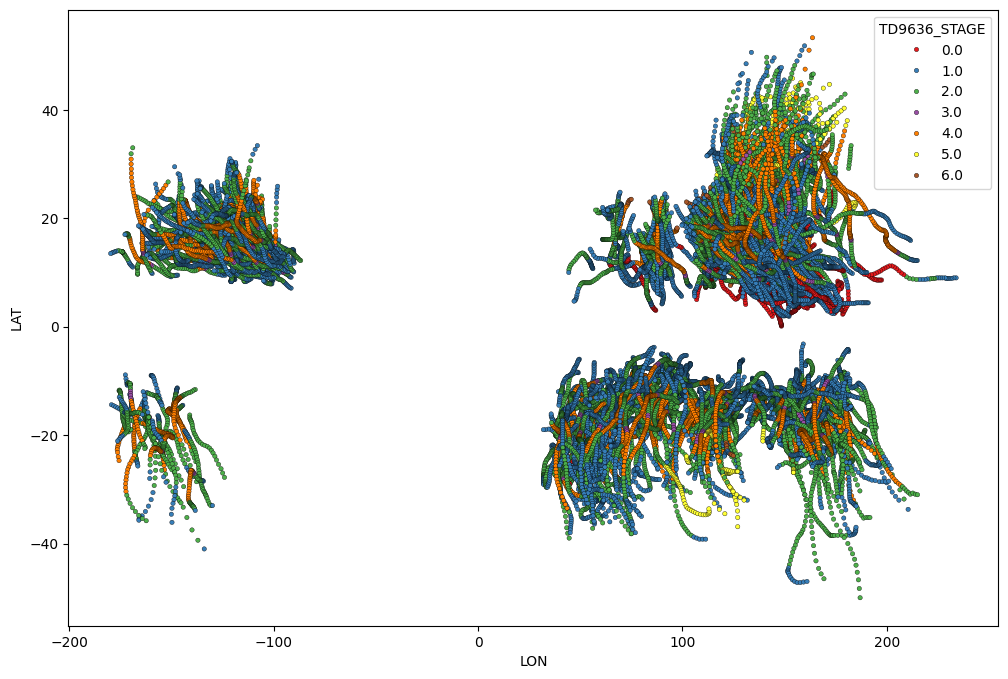

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="LON", 
    y="LAT", 
    hue="TD9636_STAGE",  
    palette="Set1",     
    data=df_analys, 
    s=10, 
    edgecolor="k"
)

<Figure size 1200x800 with 0 Axes>

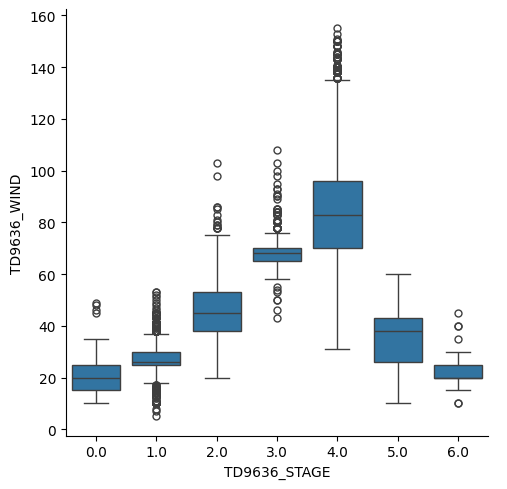

In [47]:
plt.figure(figsize=(12, 8))
sns.catplot(data=df_analys, x="TD9636_STAGE", y="TD9636_WIND", kind="box")

<Axes: xlabel='TD9636_STAGE', ylabel='MONTH'>

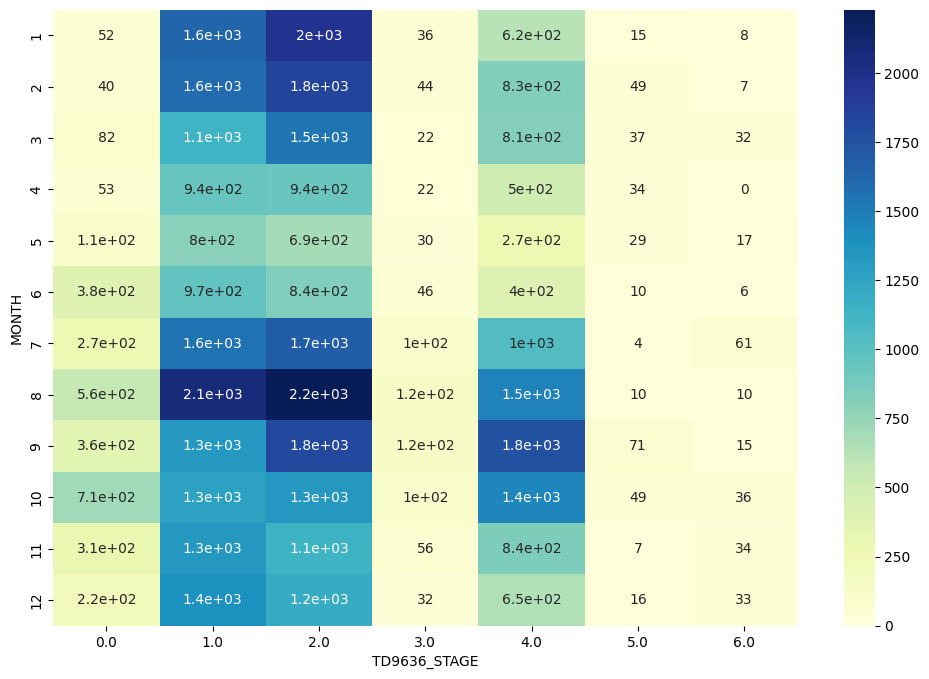

In [48]:
month_pivot_table = df_analys.pivot_table(index='MONTH', columns='TD9636_STAGE', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(month_pivot_table, annot=True, cmap="YlGnBu")

In [49]:
df_analys.NATURE.value_counts()

NATURE
TS    42660
MX     3077
DS     2305
ET      171
NR      130
Name: count, dtype: int64

<Axes: xlabel='TD9636_STAGE', ylabel='NATURE'>

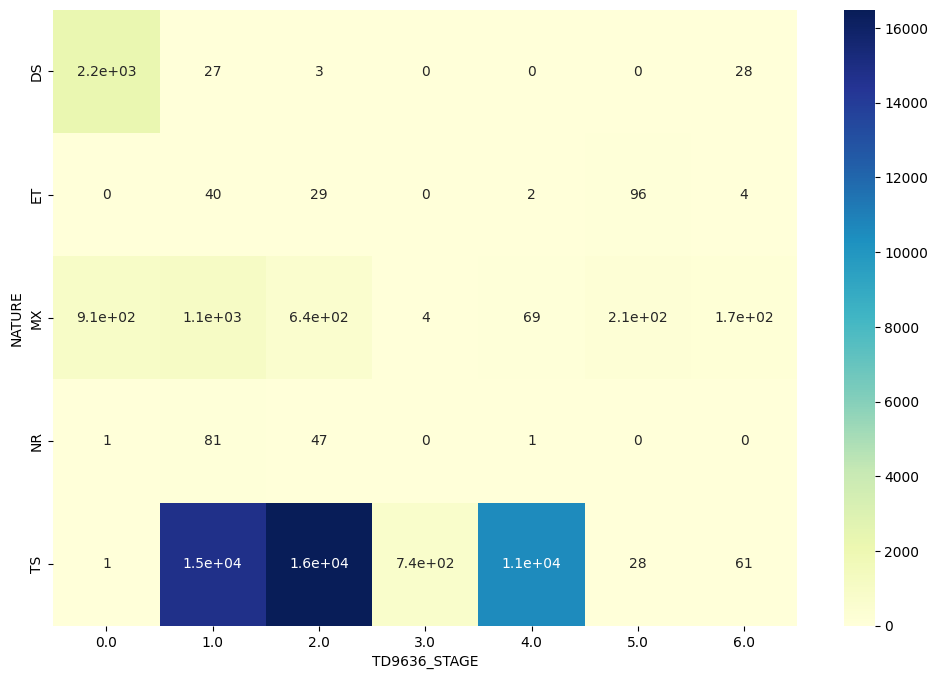

In [50]:
nature_pivot_table = df_analys.pivot_table(index='NATURE', columns='TD9636_STAGE', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(nature_pivot_table, annot=True, cmap="YlGnBu")

<Figure size 1200x800 with 0 Axes>

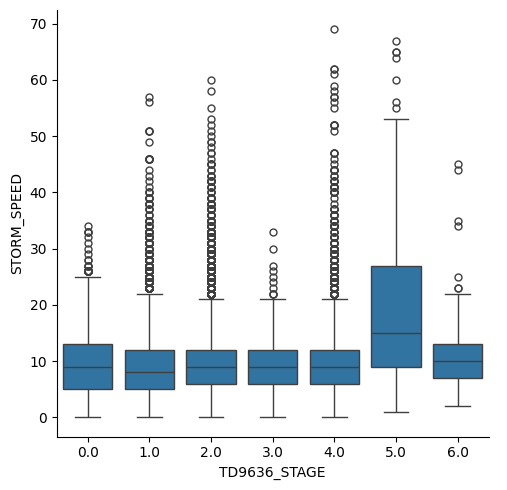

In [51]:
plt.figure(figsize=(12, 8))
sns.catplot(data=df_analys, x="TD9636_STAGE", y="STORM_SPEED", kind="box")

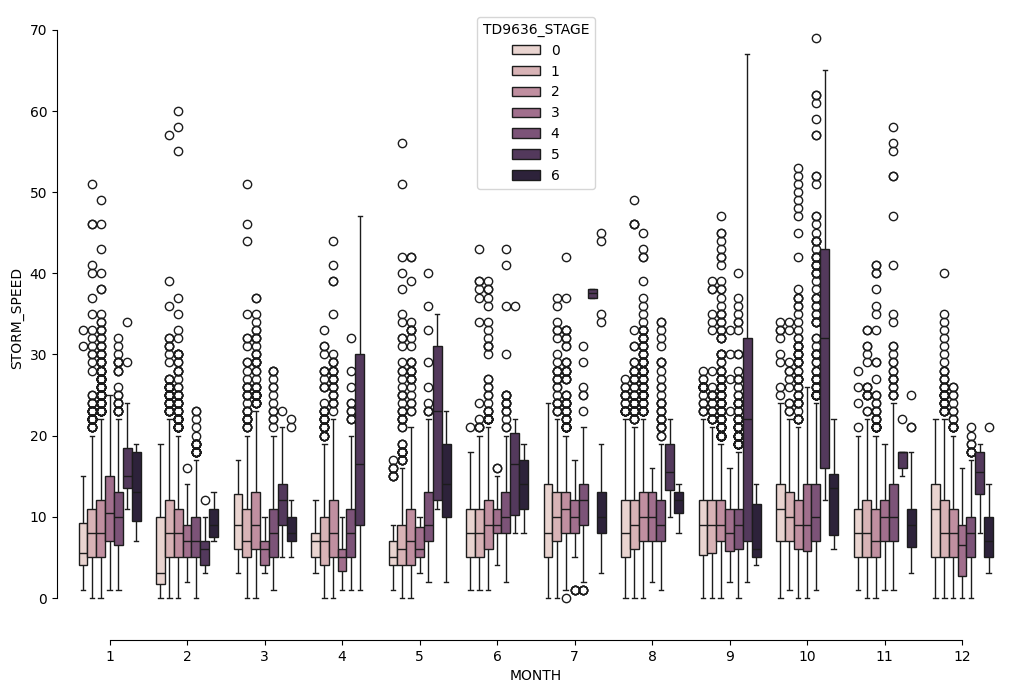

In [52]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="MONTH", y="STORM_SPEED",
            hue="TD9636_STAGE",
            data=df_analys)
sns.despine(offset=10, trim=True)

In [53]:
df_analys.STORM_DIR.describe()

count     48342.0
unique       73.0
top         280.0
freq       2407.0
Name: STORM_DIR, dtype: float64